# Capstone Project - Credit Card Default Prediction

### Data source:
 - https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

## Import packages and data into environment

In [1]:
#--Import os and time packages, and set seed--#

import time
import os
#os.chdir('D:\\')

import random
random.seed(2591697151059353230)

In [2]:
#--Import packages for data wrangling and analysis--#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm #-- for quantile comparison

In [3]:
#--Define function generating normal QQ plots--#

def ser_quantile_plot(series, n=1000):
    mu = series.mean()
    sig = series.std()
    normed_series = (series-mu)/sig
    my_range = (np.arange(n)+1)/(n+1)
    my_x = []
    my_y = []
    for i in my_range:
        x = norm.ppf(i, loc=0, scale=1)
        y = normed_series.quantile(i)
        my_x = my_x + [x]
        my_y = my_y + [y]
    my_x = np.array(my_x)
    my_y = np.array(my_y)
    my_min = my_x.min()
    my_max = my_x.max()
    my_vec = [my_min, my_max]
    plt.plot(my_x, my_y)
    plt.plot(my_vec, my_vec, color='red', linestyle = '--')
    plt.show()

In [5]:
os.listdir()

['deepfake-detection-challenge',
 '.DS_Store',
 'Icon\r',
 'Untitled.ipynb',
 'default-of-credit-card-clients.csv',
 '_Capstone_Notebook.ipynb',
 '.ipynb_checkpoints']

In [6]:
#--Read default data into environment--#

my_data = pd.read_csv('default-of-credit-card-clients.csv')
my_data = my_data.loc[:,'LIMIT_BAL':'default payment next month'] #--remove unusable 'ID' variable

In [7]:
#--Remove entries with unusual values--#

my_data = my_data[my_data.MARRIAGE <3]
my_data = my_data[my_data.MARRIAGE >0]

my_data = my_data[my_data.BILL_AMT1 >-2500]
my_data = my_data[my_data.BILL_AMT2 >-2500]
my_data = my_data[my_data.BILL_AMT3 >-2500]
my_data = my_data[my_data.BILL_AMT4 >-2500]
my_data = my_data[my_data.BILL_AMT5 >-2500]
my_data = my_data[my_data.BILL_AMT6 >-2500]

In [8]:
#--Define function for QQ plots of attributes with function 'fun'--# 

def data_qplot(name, fun=lambda x:x):
    return ser_quantile_plot(my_data[name].apply(fun))

## EXPLORATORY DATA ANALYSIS

In [9]:
#--Check correlations--#

def_corr = pd.DataFrame(my_data.corr())['default payment next month']
def_corr

LIMIT_BAL                    -0.153745
SEX                          -0.039244
EDUCATION                     0.029292
MARRIAGE                     -0.031499
AGE                           0.013298
PAY_0                         0.327231
PAY_2                         0.265271
PAY_3                         0.235321
PAY_4                         0.216844
PAY_5                         0.204942
PAY_6                         0.187850
BILL_AMT1                    -0.020341
BILL_AMT2                    -0.014396
BILL_AMT3                    -0.013706
BILL_AMT4                    -0.010574
BILL_AMT5                    -0.006774
BILL_AMT6                    -0.004981
PAY_AMT1                     -0.076768
PAY_AMT2                     -0.067170
PAY_AMT3                     -0.059617
PAY_AMT4                     -0.058911
PAY_AMT5                     -0.057082
PAY_AMT6                     -0.055492
default payment next month    1.000000
Name: default payment next month, dtype: float64

### Example of function effect:

PAY_AMT1


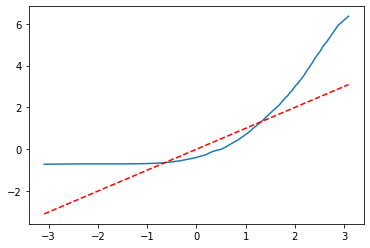

In [10]:
#-- QQ plot for BILL_AMT1 variable--#

print('PAY_AMT1')
data_qplot('BILL_AMT1')

log(PAY_AMT1+2500)


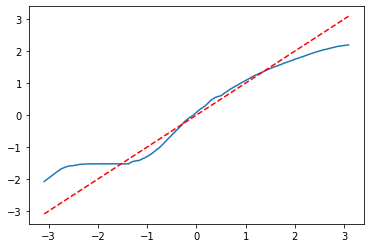

In [11]:
#-- QQ plot for BILL_AMT1 variable with log function--#

print('log(PAY_AMT1+2500)')
data_qplot('BILL_AMT1', lambda x: np.log(x+2500))

## Example PAY_AMT variable histograms:

PAY_AMT1


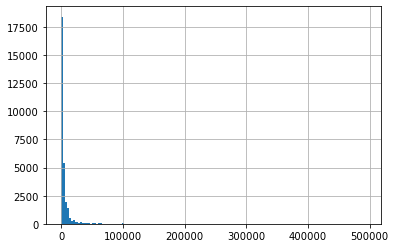

In [12]:
#-- histogram of PAY_AMT1 variable--#

print('PAY_AMT1')
my_data['PAY_AMT1'].hist(bins=150)
plt.show()

log(PAY_AMT1+1)


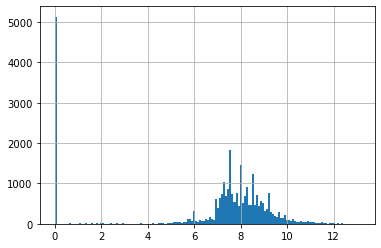

In [13]:
#--Histogram of log(PAY_AMT1 +1)--#

print('log(PAY_AMT1+1)')
my_data['PAY_AMT1'].apply(lambda x: np.log(x+1)).hist(bins=150)
plt.show()

In [14]:
#--Defines functions to create indicator and continuous parts of PAY variable--#

def pay_is_zero(value):
    if value == 0:
        return 1
    else:
        return 0
    
def pay_positive(value):
    if value > 0:
        return np.log(value)
    else:
        return np.nan

In [15]:
#--Creates copy of data for transformation-##

t_data = my_data.copy()

In [16]:
#--Apply transformations to normalise numerical data--#

t_data['LIMIT_BAL']   = my_data.LIMIT_BAL.apply(lambda x: x**0.5)
t_data['SEX']       = my_data.SEX.apply(lambda x: x-1)
t_data['EDUCATION'] = my_data.EDUCATION.apply(lambda x: x)
t_data['MARRIAGE']  = my_data.MARRIAGE.apply(lambda x: x-1)
t_data['AGE']       = my_data.AGE.apply(lambda x: x**0.5)
t_data['PAY_0']  = my_data.PAY_0.apply(lambda x: x)

t_data['BILL_AMT1'] = my_data.BILL_AMT1.apply(lambda x:np.log(x+2500))
t_data['BILL_AMT2'] = my_data.BILL_AMT2.apply(lambda x:np.log(x+2500))
t_data['BILL_AMT3'] = my_data.BILL_AMT3.apply(lambda x:np.log(x+2500))
t_data['BILL_AMT4'] = my_data.BILL_AMT4.apply(lambda x:np.log(x+2500))
t_data['BILL_AMT5'] = my_data.BILL_AMT5.apply(lambda x:np.log(x+2500))
t_data['BILL_AMT6'] = my_data.BILL_AMT6.apply(lambda x:np.log(x+2500))

#--Separates PAY variables into discrete indicators of 0, and positive parts-#

t_data['PAY_AMT1_is_0'] = my_data.PAY_AMT1.apply(pay_is_zero)
t_data['PAY_AMT1_>_0']  = my_data.PAY_AMT1.apply(pay_positive)

t_data['PAY_AMT2_is_0'] = my_data.PAY_AMT2.apply(pay_is_zero)
t_data['PAY_AMT2_>_0']  = my_data.PAY_AMT2.apply(pay_positive)

t_data['PAY_AMT3_is_0'] = my_data.PAY_AMT3.apply(pay_is_zero)
t_data['PAY_AMT3_>_0']  = my_data.PAY_AMT3.apply(pay_positive)

t_data['PAY_AMT4_is_0'] = my_data.PAY_AMT4.apply(pay_is_zero)
t_data['PAY_AMT4_>_0']  = my_data.PAY_AMT4.apply(pay_positive)

t_data['PAY_AMT5_is_0'] = my_data.PAY_AMT5.apply(pay_is_zero)
t_data['PAY_AMT5_>_0']  = my_data.PAY_AMT5.apply(pay_positive)

t_data['PAY_AMT6_is_0'] = my_data.PAY_AMT6.apply(pay_is_zero)
t_data['PAY_AMT6_>_0']  = my_data.PAY_AMT6.apply(pay_positive)

In [17]:
t_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2_is_0,PAY_AMT2_>_0,PAY_AMT3_is_0,PAY_AMT3_>_0,PAY_AMT4_is_0,PAY_AMT4_>_0,PAY_AMT5_is_0,PAY_AMT5_>_0,PAY_AMT6_is_0,PAY_AMT6_>_0
0,141.421356,1,2,0,4.898979,2,2,-1,-1,-2,...,0,6.535241,1,NaN,1,NaN,1,NaN,1,NaN
1,346.410162,1,2,1,5.099020,-1,2,0,0,0,...,0,6.907755,0,6.907755,0,6.907755,1,NaN,0,7.600902
2,300.000000,1,2,1,5.830952,0,0,0,0,0,...,0,7.313220,0,6.907755,0,6.907755,0,6.907755,0,8.517193
3,223.606798,1,2,0,6.082763,0,0,0,0,0,...,0,7.610358,0,7.090077,0,7.003065,0,6.974479,0,6.907755
4,223.606798,0,2,0,7.549834,-1,0,-1,0,0,...,0,10.510014,0,9.210340,0,9.104980,0,6.535241,0,6.520621


PAY_AMT1_is_0


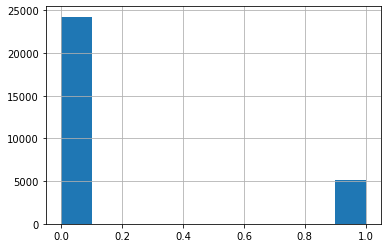

In [18]:
#--Histogram of indicator part of PAY_AMT1 (=1 if PAY=0)--#

print('PAY_AMT1_is_0')
t_data['PAY_AMT1_is_0'].hist()
plt.show()

log(PAY_AMT1_>_0+1)


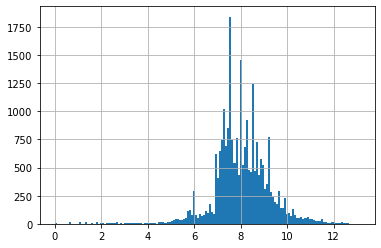

In [19]:
#--Histogram of continuous part of log(PAY_AMT1+1)--#

print('log(PAY_AMT1_>_0+1)')
t_data['PAY_AMT1_>_0'].hist(bins=150)
plt.show()

## DATA PREPROCESSING

### Feature and Target Identification

In [20]:
target = ['default payment next month']
feature_list = [var for var in t_data.columns if var not in target]

X = t_data[feature_list]
y = t_data[target]

### IMPUTATION

In [21]:
#--Impute data for missing values--#
#-Adds noise, but is required for processing-#

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_imputer = IterativeImputer(max_iter=10, random_state=0)

data_fit = data_imputer.fit(X)

X = pd.DataFrame(data_fit.transform(X), columns = X.columns)

## NORMALISER

In [22]:
#--Normalise all numerical values for future processing--#

from sklearn.preprocessing import normalize

categorical_variables = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6''PAY_AMT_IS_0', 'PAY_AMT_IS_1', 'PAY_AMT_IS_2', 'PAY_AMT_IS_3', 'PAY_AMT_IS_4',
                        'PAY_AMT_IS_5', 'PAY_AMT_IS_6']
numerical_variables = [var for var in X.columns if var not in categorical_variables]

for var in numerical_variables:
    normed_var = normalize(X[var].values.reshape(-1,1), axis=0)
    X[var] = normed_var

## Create and Train Prediction Models

In [23]:
#--Import splitting and neural network packages--#

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [24]:
#--Import evaluation metrics for models--#

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix

In [25]:
#--Import classical models from sklearn--#

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier

In [26]:
#--Create custom neural net--#

def my_neural_net():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dropout(.1),
      layers.Dense(1, activation='relu')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=[tf.keras.metrics.BinaryAccuracy(
        name="binary_accuracy", dtype=None, threshold=0.5
    )])
    return model

In [27]:
#--Import neural net into sklearn--#

skl_neural_net = KerasClassifier(build_fn=my_neural_net, epochs=50, verbose=0)

In [28]:
#--Combine all simple models into dataframe with their names--#

model_name = ['Logistic Regression', 'Ridge', 'Naive Bayes', 'K Nearest', 'Radius', 'Centroid', 'SVM linear',
             'SVM poly', 'SVM rbf', 'SVM sig', 'Decision Tree', 'Extra Tree', 'Neural Net']

model_list = [LogisticRegression(), RidgeClassifier(), GaussianNB(), KNeighborsClassifier(), RadiusNeighborsClassifier(radius=10),
              NearestCentroid(), SVC(kernel='linear'), SVC(kernel='poly'), SVC(kernel='rbf'), SVC(kernel='sigmoid'),
              DecisionTreeClassifier(), ExtraTreeClassifier(), skl_neural_net]

model_frame = pd.DataFrame(model_list, model_name)

#--List all ensemble estimators--#

ensemble_estimators = [('Logistic', LogisticRegression()), ('Ridge', RidgeClassifier()), ('SVM rbf', SVC(kernel='rbf'))]

ensemble_name = ['AdaBoost', 'Bagging', 'Gradient Boost', 'Random Forest',
                 'Stacking', 'Voting']

ensemble_list = [AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), RandomForestClassifier(),
                 StackingClassifier(estimators=ensemble_estimators), VotingClassifier(estimators=ensemble_estimators)]

## Split Data into Train and Test Sets

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [30]:
#--Generate dataframe report for each simple model with evaluation metrics--#

my_report = []
for nam, mod in model_frame.iterrows():
    start_time=time.time()
    if nam != 'Neural Net':
        fitted_model = mod[0].fit(X_train, Y_train)
        y_pred = fitted_model.predict(X_test)
    else:
        fitted_model = mod[0].fit(X_train, Y_train)
        y_pred = np.round(fitted_model.model.predict(X_test))
    end_time=time.time()
    time_diff = end_time-start_time
    my_report = my_report + [(nam, time_diff, accuracy_score(y_pred, Y_test), roc_auc_score(y_pred, Y_test), precision_score(y_pred, Y_test), recall_score(y_pred, Y_test))]
    
my_report = pd.DataFrame(my_report, columns=['Model', 'time to run (sec)', 'Accuracy', 'AUC', 'Precision', 'Recall'])
my_report = my_report.set_index('Model')
my_report

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-30-c81fbd967d1d>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  fitted_model = mod[0].fit(X_train, Y_train)
/opt/an

,time to run (sec),Accuracy,AUC,Precision,Recall
Model,,,,,
Logistic Regression,0.180181,0.811671,0.753570,0.208967,0.686842
Ridge,0.059992,0.805716,0.757689,0.147318,0.704981
Naive Bayes,0.027643,0.680674,0.621858,0.658927,0.361917
K Nearest,2.970447,0.803675,0.700714,0.369095,0.557437
Radius,21.431726,0.789384,0.764356,0.013611,0.739130
Centroid,0.028436,0.783600,0.680691,0.527622,0.491424
SVM linear,100.461746,0.813712,0.753164,0.230584,0.682464
SVM poly,46.023752,0.814563,0.753214,0.239392,0.681093
SVM rbf,27.191457,0.827662,0.768073,0.339472,0.692810


In [31]:
#--Generate dataframe report for each simple model with evaluation metrics--#

ensemble_report = []
for i in range(6):
    nam = ensemble_name[i]
    mod = ensemble_list[i]
    start_time=time.time()
    fitted_model = mod.fit(X_train, Y_train)
    y_pred = fitted_model.predict(X_test)
    end_time=time.time()
    time_diff = end_time-start_time
    ensemble_report = ensemble_report + [(nam, time_diff, accuracy_score(y_pred, Y_test), roc_auc_score(y_pred, Y_test), precision_score(y_pred, Y_test), recall_score(y_pred, Y_test))]
    
ensemble_report = pd.DataFrame(ensemble_report, columns=['Model', 'time to run (sec)', 'Accuracy', 'AUC', 'Precision', 'Recall'])
ensemble_report = ensemble_report.set_index('Model')
ensemble_report

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-31-9becf553405c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fitted_model = mod.fit(X_train, Y_train)
/opt/anacon

,time to run (sec),Accuracy,AUC,Precision,Recall
Model,,,,,
AdaBoost,2.449774,0.821708,0.754807,0.315452,0.671210
Bagging,4.909193,0.801633,0.696792,0.315452,0.558865
Gradient Boost,11.410031,0.826982,0.760341,0.359488,0.674174
Random Forest,6.706558,0.820687,0.741921,0.360288,0.638298
Stacking,113.899067,0.827492,0.766759,0.341873,0.689822
Voting,27.608104,0.812521,0.755977,0.212970,0.690909
